## Crpto-Currency Analysis :
### Comparision of Ethereum and Bitcoin

In [129]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [128]:
data = pd.read_csv('all_currencies.csv')

In [3]:
data.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [4]:
data = data.drop('Unnamed: 0',axis = 1)

In [5]:
data.head()

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [6]:
data['year'] = data['Date'].apply(lambda x:x.split('-')[0])

In [29]:
btc_mon = pd.read_csv('Bitcoin Historical Data -monthly.csv')

In [30]:
btc_mon.head()

,Date,Price,Open,High,Low,Vol.
0,Jul-20,9681.3,9135.9,9729.3,8932.1,10.00M
1,Jun-20,9135.4,9454.5,10301.8,8865.3,15.35M
2,May-20,9454.8,8628.6,10033.0,8235.6,38.48M
3,Apr-20,8629.0,6412.4,9437.5,6157.4,39.41M
4,Mar-20,6412.5,8543.8,9180.8,3869.5,48.24M


In [31]:
btc_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    87 non-null     object 
 1   Price   87 non-null     float64
 2   Open    87 non-null     float64
 3   High    87 non-null     float64
 4   Low     87 non-null     float64
 5   Vol.    87 non-null     object 
dtypes: float64(4), object(2)
memory usage: 4.2+ KB


In [32]:
eth_mon = pd.read_csv('ETH_monthly Historical Data.csv')

In [33]:
eth_mon.head()

,Date,Price,Open,High,Low,Vol.
0,Apr-19,170.59,143.78,187.70,141.55,4.82M
1,Mar-19,143.78,138.17,148.52,125.89,4.63M
2,Feb-19,138.17,108.61,169.90,102.61,8.30M
3,Jan-19,108.45,136.00,166.62,103.22,9.73M
4,Dec-18,136.00,113.63,163.50,83.00,16.40M


In [34]:
eth_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    37 non-null     object 
 1   Price   37 non-null     float64
 2   Open    37 non-null     float64
 3   High    37 non-null     float64
 4   Low     37 non-null     float64
 5   Vol.    37 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.9+ KB


In [35]:
def year_mon(data):
    a = []
    for i in data:
        a.append('20'+i.split('-')[-1])
    return a

In [36]:
btc_mon['month'] = btc_mon['Date'].apply(lambda x: x.split('-')[0])
eth_mon['month'] = eth_mon['Date'].apply(lambda x: x.split('-')[0])

In [37]:
btc_mon['year'] = year_mon(btc_mon['Date']) 
eth_mon['year'] = year_mon(eth_mon['Date']) 

In [38]:
a=[]
chars = ['.','*']
for i in btc_mon['Vol.']:
    if i[-1]=='M':
        a.append(float(i.split('M')[0]))
    else:
        a.append(float(i.split('K')[0])/1000)
btc_mon['Vol.']=a

In [39]:
a=[]
chars = ['.','*']
for i in eth_mon['Vol.']:
    if i[-1]=='M':
        a.append(float(i.split('M')[0]))
    else:
        a.append(float(i.split('K')[0])/1000)
eth_mon['Vol.']=a

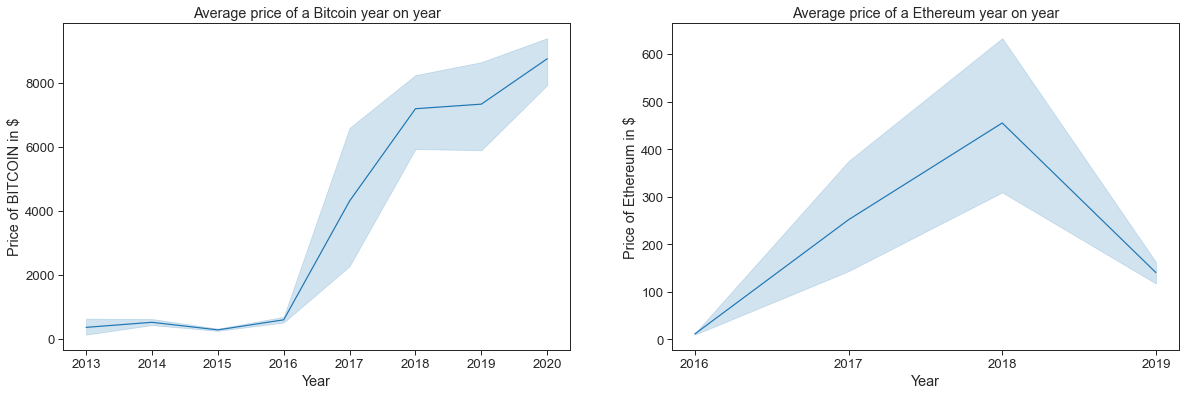

In [43]:
plt.figure(figsize = (20,6))
sns.set_style("ticks")
sns.set_context("paper",font_scale=1.5)

plt.subplot(1,2,1)
ax = sns.lineplot(btc_mon['year'],y= btc_mon['Price']);
plt.xlabel("Year");
plt.ylabel("Price of BITCOIN in $");
plt.title("Average price of a Bitcoin year on year");

plt.subplot(1,2,2)
ax = sns.lineplot(eth_mon['year'],y= eth_mon['Price']);
plt.xlabel("Year");
plt.ylabel("Price of Ethereum in $");
plt.title("Average price of a Ethereum year on year");

In [45]:
btc_mon['month'].value_counts().index

Index(['Jul', 'Jun', 'May', 'Jan', 'Oct', 'Feb', 'Apr', 'Sep', 'Aug', 'Dec',
       'Nov', 'Mar'],
      dtype='object')

In [46]:
eth_mon['month'].value_counts().index

Index(['Apr', 'Jan', 'Sep', 'Oct', 'Feb', 'Jul', 'Jun', 'Aug', 'Dec', 'Nov',
       'Mar', 'May'],
      dtype='object')

In [47]:
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [62]:
Avg_bit = btc_mon.groupby('year')[['Price']].mean()
Avg_bit['year'] = list(Avg_bit.index)
Avg_bit

,Price,year
year,,
2013,354.775000,2013
2014,513.041667,2014
2015,276.225000,2015
2016,589.800000,2016
2017,4299.758333,2017
2018,7183.125000,2018
2019,7325.841667,2019
2020,8743.685714,2020


In [61]:
Avg_eth = eth_mon.groupby('year')[['Price']].mean()
Avg_eth['year'] = list(Avg_eth.index)
Avg_eth

,Price,year
year,,
2016,11.083333,2016
2017,251.498333,2017
2018,455.120000,2018
2019,140.247500,2019


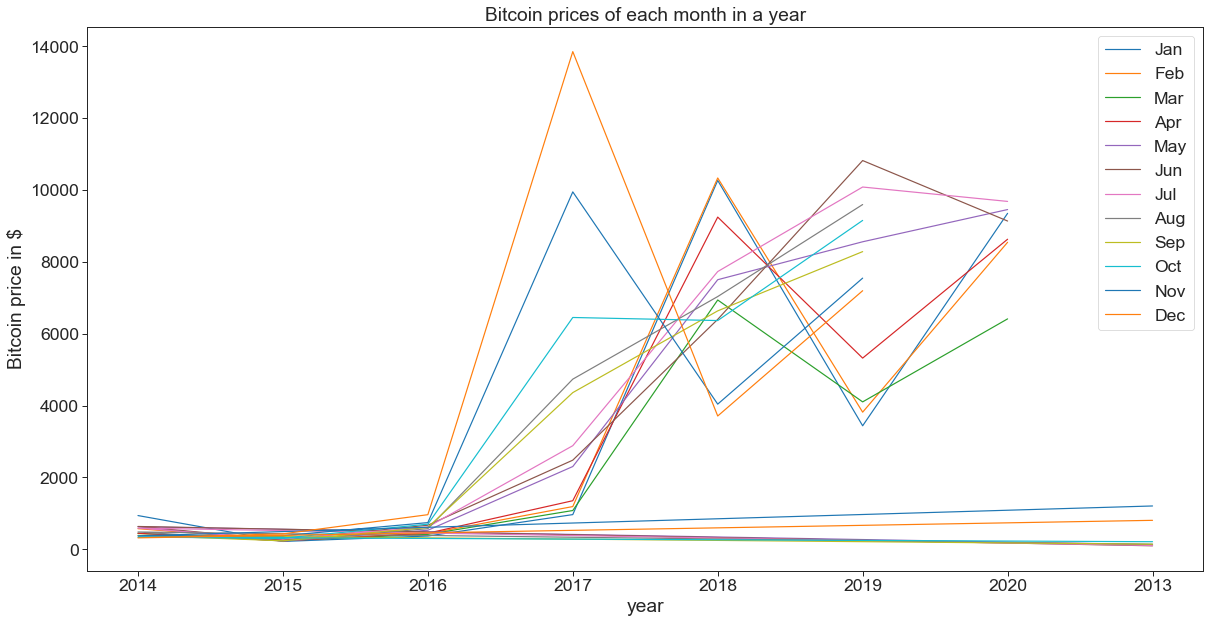

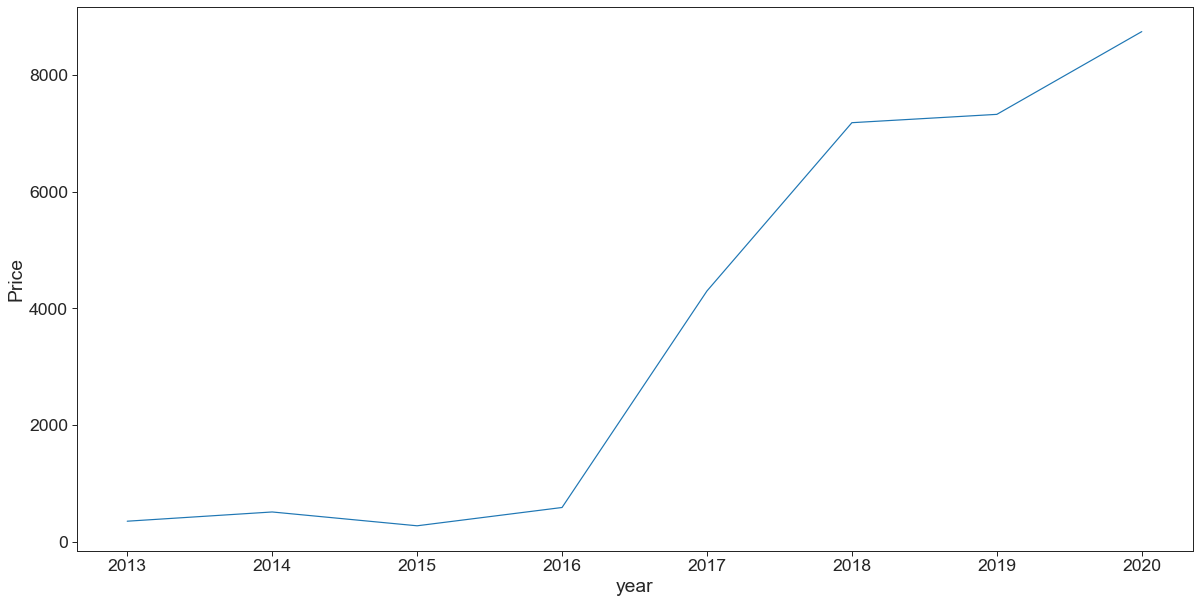

In [71]:
plt.figure(figsize = (20,10))
sns.set_style("ticks")
sns.set_context("paper",font_scale=2)

for i in mon:
    p = btc_mon[btc_mon['month']== i][['Price','month','year']]
    sns.lineplot(p['year'],p['Price'],sizes=2)
plt.xlabel("year")
plt.ylabel("Bitcoin price in $")
plt.title("Bitcoin prices of each month in a year")
plt.legend(mon);

plt.figure(figsize = (20,10))
sns.set_style("ticks")
sns.set_context("paper",font_scale=2)
Avg_bit = btc_mon.groupby('year')[['Price']].mean()
Avg_bit['year'] = list(Avg_bit.index)
sns.lineplot(Avg_bit['year'],Avg_bit['Price']);



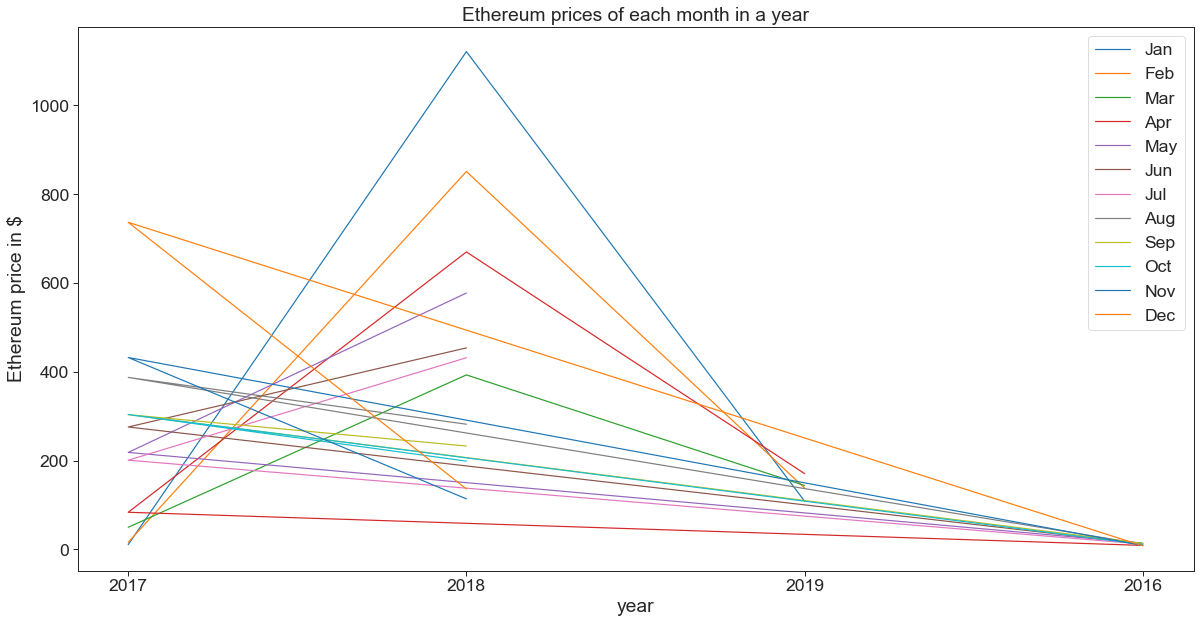

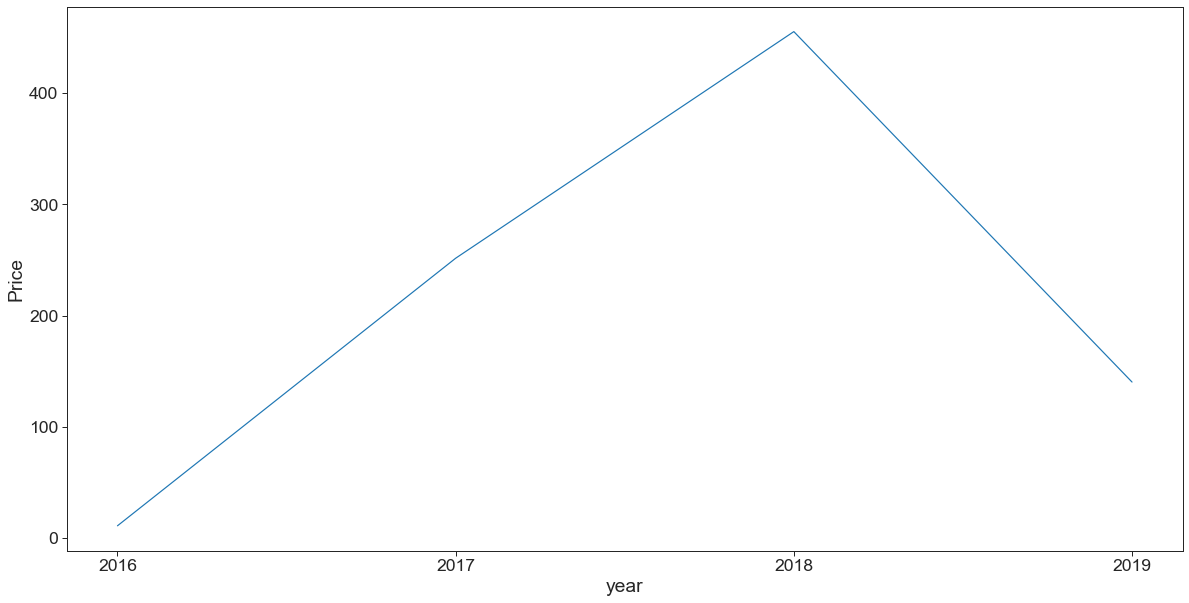

In [78]:
plt.figure(figsize = (20,10))
sns.set_style("ticks")
sns.set_context("paper",font_scale=2)

for i in mon:
    p = eth_mon[eth_mon['month']== i][['Price','month','year']]
    x = p['year']
    y = p['Price']
    sns.lineplot(x,y)
plt.xlabel("year")
plt.ylabel("Ethereum price in $")
plt.title("Ethereum prices of each month in a year")
plt.legend(mon);

plt.figure(figsize = (20,10))
sns.set_style("ticks")
sns.set_context("paper",font_scale=2)
Avg_eth = eth_mon.groupby('year')[['Price']].mean()
Avg_eth['year'] = list(Avg_eth.index)
sns.lineplot(Avg_eth['year'],Avg_eth['Price']);

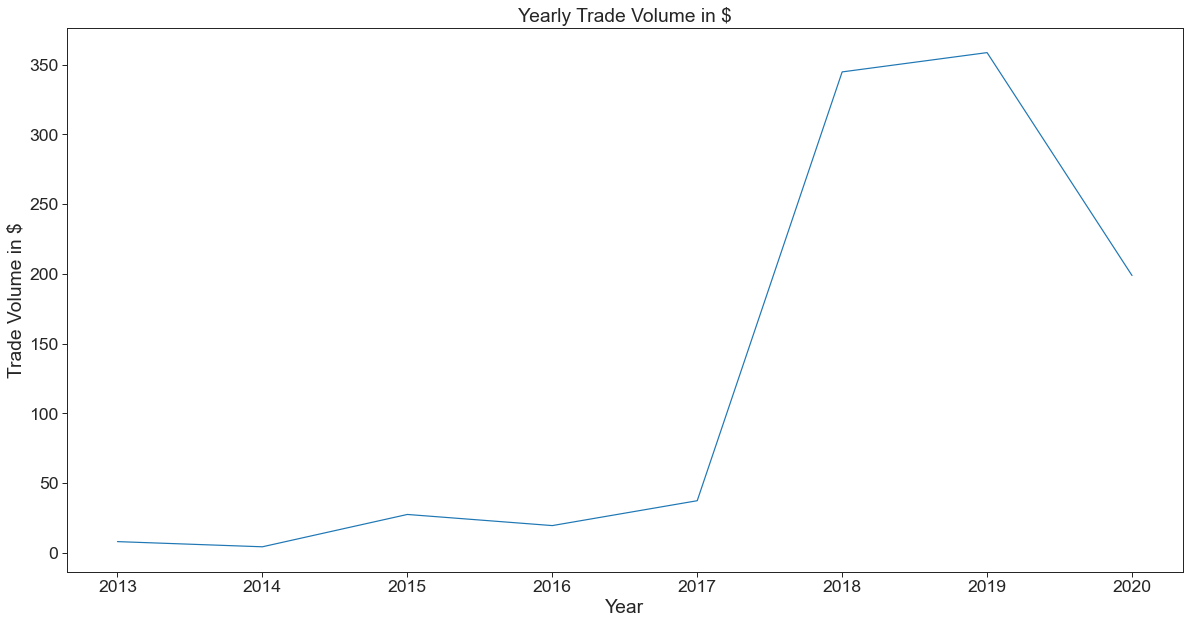

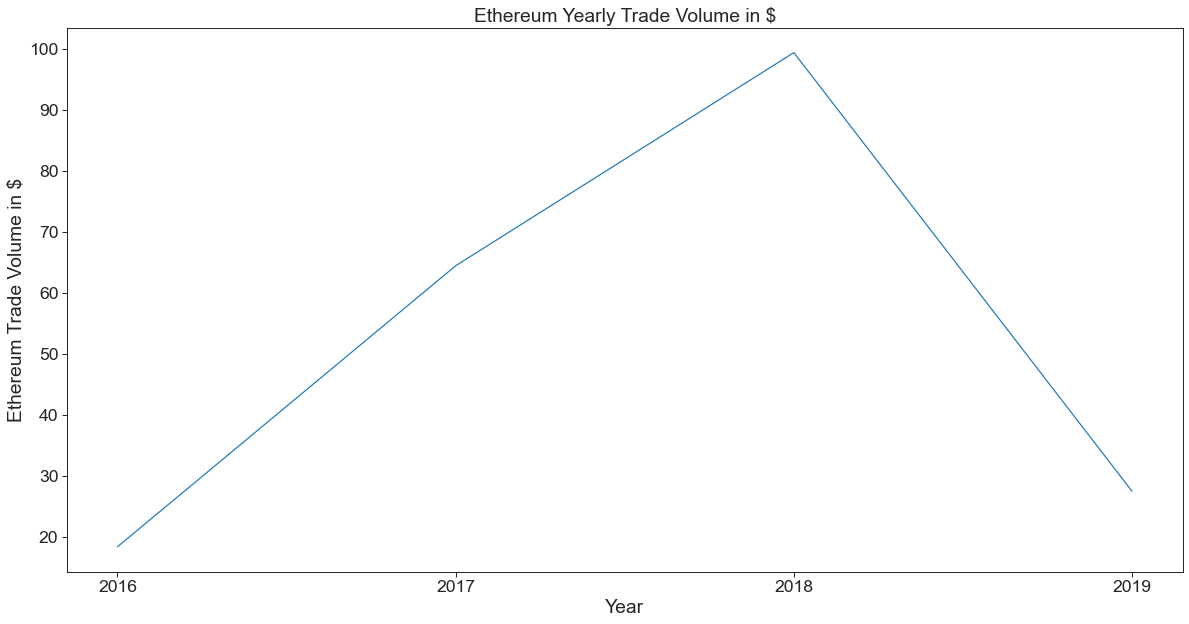

In [81]:
trade_vol_btc = btc_mon.groupby('year')[['Vol.']].sum()
plt.figure(figsize = (20,10))
sns.set_style("ticks")
sns.set_context("paper",font_scale=2)

sns.lineplot(list(trade_vol_btc.index),trade_vol_btc['Vol.'])
plt.xlabel('Year')
plt.ylabel('Trade Volume in $')
plt.title("Yearly Trade Volume in $");

trade_vol_eth = eth_mon.groupby('year')[['Vol.']].sum()
plt.figure(figsize = (20,10))
sns.set_style("ticks")
sns.set_context("paper",font_scale=2)

sns.lineplot(list(trade_vol_eth.index),trade_vol_eth['Vol.'])
plt.xlabel('Year')
plt.ylabel('Ethereum Trade Volume in $')
plt.title("Ethereum Yearly Trade Volume in $");

In [100]:
import matplotlib.dates as mpl_dates
Bitcoin = data[data['Symbol'] == 'BTC']
Ethereum = data[data['Symbol'] == 'ETH']

BitcoinOHLC = Bitcoin[['Date','Open','High','Low','Close']]
EthereumOHLC = Ethereum[['Date','Open','High','Low','Close']]

BitcoinOHLC['Date'] = pd.to_datetime(BitcoinOHLC['Date'])
BitcoinOHLC['Date'] = BitcoinOHLC['Date'].apply(mpl_dates.date2num)

EthereumOHLC['Date'] = pd.to_datetime(EthereumOHLC['Date'])
EthereumOHLC['Date'] = EthereumOHLC['Date'].apply(mpl_dates.date2num)

C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


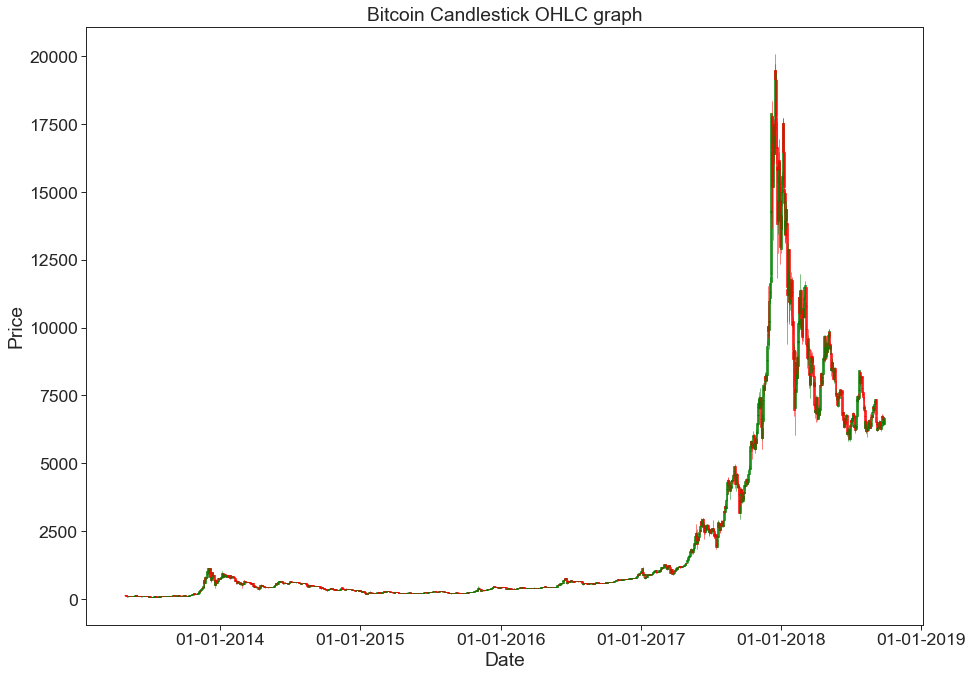

In [109]:
f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
plt.xlabel("Date")
candlestick_ohlc(ax,BitcoinOHLC.values,width=5, colorup='g', colordown='r',alpha=0.75)
ax.set_xticklabels(ax.get_xticks())
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
plt.ylabel("Price")
plt.title("Bitcoin Candlestick OHLC graph")
plt.show();

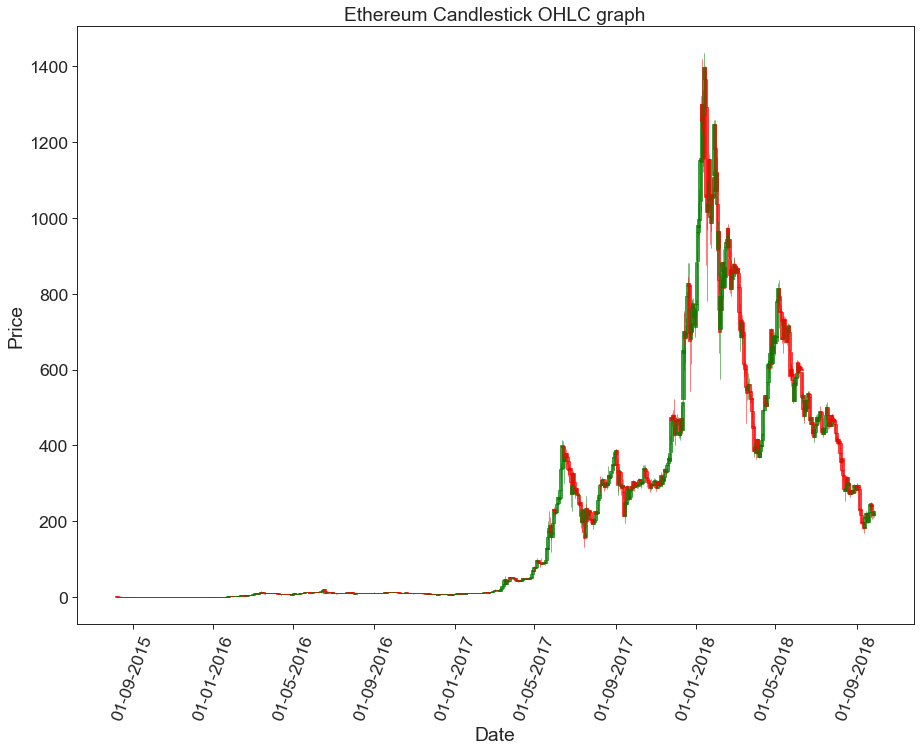

In [111]:
f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
plt.xlabel("Date")
candlestick_ohlc(ax,EthereumOHLC.values,width=5, colorup='g', colordown='r',alpha=0.75)
ax.set_xticklabels(ax.get_xticks(),rotation=70)
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
plt.ylabel("Price")
plt.title("Ethereum Candlestick OHLC graph")
plt.show();

### Prediction of Bitcoin Price

In [112]:
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [113]:
data = pd.read_csv("BTC-USD.csv")

In [114]:
data = data.set_index("Date")[['Close']].tail(1000)
data = data.set_index(pd.to_datetime(data.index))

In [115]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

In [116]:
def training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [117]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)


def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Create a specified number of hidden layers for an RNN
    Optional: Adds regularization option, dropout layer to prevent potential overfitting if necessary
    """
    
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [121]:

## no of periods to train 
n_per_in  = 30

# no of periods ahead to predict
n_per_out = 10

# only one feature price
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(data.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [122]:
# Instantiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 12)            2064      
_________________________________________________________________
lstm_11 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_12 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_15 (LSTM)               (None, 30, 12)           

In [124]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [130]:
res = model.fit(X, y, epochs=200, batch_size=32, validation_split=0.1)

Train on 864 samples, validate on 97 samples
Epoch 1/200
864/864 [==============================] - 6s 8ms/step - loss: 0.0050 - accuracy: 0.1343 - val_loss: 0.0026 - val_accuracy: 0.0825
Epoch 2/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0051 - accuracy: 0.1042 - val_loss: 0.0028 - val_accuracy: 0.0825
Epoch 3/200
864/864 [==============================] - 6s 7ms/step - loss: 0.0046 - accuracy: 0.1192 - val_loss: 0.0036 - val_accuracy: 0.0825
Epoch 4/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0041 - accuracy: 0.1088 - val_loss: 0.0049 - val_accuracy: 0.0825
Epoch 5/200
864/864 [==============================] - 6s 6ms/step - loss: 0.0043 - accuracy: 0.1088 - val_loss: 0.0054 - val_accuracy: 0.0825
Epoch 6/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0042 - accuracy: 0.1088 - val_loss: 0.0033 - val_accuracy: 0.0825
Epoch 7/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0043 - accuracy: 0.1

864/864 [==============================] - 5s 6ms/step - loss: 0.0029 - accuracy: 0.1227 - val_loss: 0.0046 - val_accuracy: 0.1753
Epoch 58/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0028 - accuracy: 0.1076 - val_loss: 0.0041 - val_accuracy: 0.1031
Epoch 59/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0030 - accuracy: 0.1076 - val_loss: 0.0069 - val_accuracy: 0.1546
Epoch 60/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0029 - accuracy: 0.1227 - val_loss: 0.0039 - val_accuracy: 0.1753
Epoch 61/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0028 - accuracy: 0.1065 - val_loss: 0.0051 - val_accuracy: 0.1959
Epoch 62/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0028 - accuracy: 0.1227 - val_loss: 0.0044 - val_accuracy: 0.1649
Epoch 63/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0028 - accuracy: 0.1134 - val_loss: 0.0051 - val_accuracy: 0.1753
Epoch

Epoch 114/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.1620 - val_loss: 0.0060 - val_accuracy: 0.0412
Epoch 115/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0022 - accuracy: 0.1400 - val_loss: 0.0083 - val_accuracy: 0.0722
Epoch 116/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.1609 - val_loss: 0.0051 - val_accuracy: 0.1134
Epoch 117/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0019 - accuracy: 0.1435 - val_loss: 0.0053 - val_accuracy: 0.0515
Epoch 118/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0019 - accuracy: 0.1262 - val_loss: 0.0079 - val_accuracy: 0.0515
Epoch 119/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0020 - accuracy: 0.1412 - val_loss: 0.0046 - val_accuracy: 0.0825
Epoch 120/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0020 - accuracy: 0.1539 - val_loss: 0.0044 - val_ac

864/864 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.2315 - val_loss: 0.0073 - val_accuracy: 0.1237
Epoch 171/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.2442 - val_loss: 0.0082 - val_accuracy: 0.1031
Epoch 172/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0012 - accuracy: 0.2269 - val_loss: 0.0066 - val_accuracy: 0.0928
Epoch 173/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0012 - accuracy: 0.2257 - val_loss: 0.0091 - val_accuracy: 0.1031
Epoch 174/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.2141 - val_loss: 0.0049 - val_accuracy: 0.0928
Epoch 175/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.2442 - val_loss: 0.0057 - val_accuracy: 0.0722
Epoch 176/200
864/864 [==============================] - 5s 6ms/step - loss: 0.0012 - accuracy: 0.2257 - val_loss: 0.0065 - val_accuracy: 0.1031

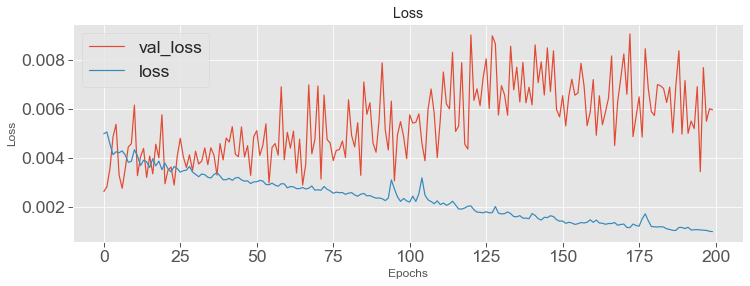

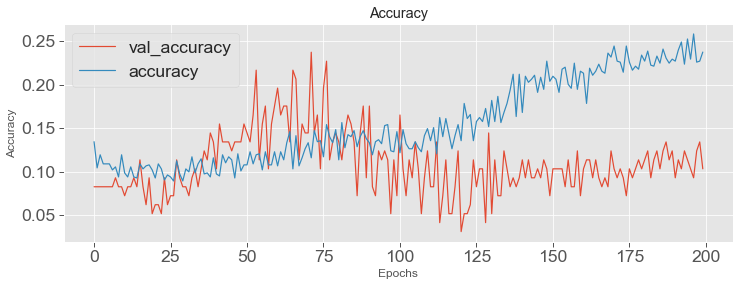

In [132]:
training_results(res)

Predicted Prices:
 [[7727.143195567814], [7568.962374927534], [7518.105040016701], [7747.9283798688875], [7633.547594496707], [7729.337486083662], [7668.860261369359], [7749.0696241632395], [7722.954756316824], [7534.368376967205]]

Actual Prices:
 [[9151.392578], [9159.040039], [9185.817383], [9164.231445], [9374.887695], [9525.363281], [9581.072266], [9536.892578], [9677.113281], [9886.116211]]


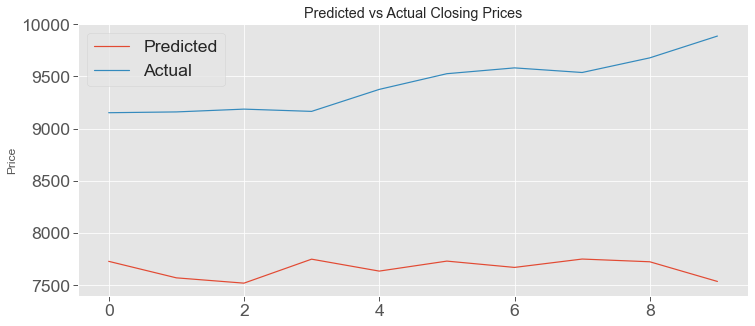

In [133]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title("Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

Predicted Prices:
 [[7727.143195567814], [7568.962374927534], [7518.105040016701], [7747.9283798688875], [7633.547594496707], [7729.337486083662], [7668.860261369359], [7749.0696241632395], [7722.954756316824], [7534.368376967205]]

Actual Prices:
 [[9151.392578], [9159.040039], [9185.817383], [9164.231445], [9374.887695], [9525.363281], [9581.072266], [9536.892578], [9677.113281], [9886.116211]]


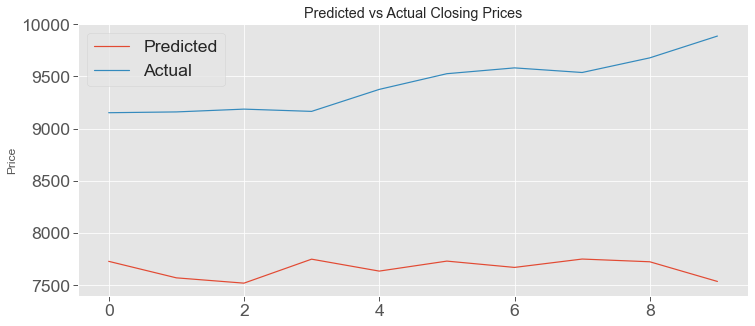

In [134]:
plt.figure(figsize=(12,5))

yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

In [135]:
yhat = model.predict(np.array(data.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=data.index[-1], periods=len(yhat), freq="D"), columns=data.columns)

print(preds)

pers = 10

actual = pd.DataFrame(scaler.inverse_transform(data[["Close"]].tail(pers)), index=data.Close.tail(pers).index, columns=data.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.xticks(rotation=45)
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()

ValueError: cannot reshape array of size 270 into shape (1,30,1)

### Price prediction of Ethereum

In [ ]:
data = pd.read_csv("ETH-USD.csv")

In [ ]:
data = data.set_index("Date")[['Close']].tail(1000)
data = data.set_index(pd.to_datetime(data.index))

In [ ]:
## no of periods to train 
n_per_in  = 30

# no of periods ahead to predict
n_per_out = 10

# only one feature price
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(data.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# Instantiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
res = model.fit(X, y, epochs=200, batch_size=32, validation_split=0.1)

In [ ]:
training_results(res)

In [ ]:
plt.figure(figsize=(12,5))

yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title("Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

In [ ]:
plt.figure(figsize=(12,5))

yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

In [ ]:
#### Prediction of Ethereum Crypto currency

yhat = model.predict(np.array(data.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=data.index[-1], periods=len(yhat), freq="D"), columns=data.columns)

print(preds)

pers = 10

actual = pd.DataFrame(scaler.inverse_transform(data[["Close"]].tail(pers)), index=data.Close.tail(pers).index, columns=data.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()

#### Conclusion :